# Travelling Behavior Predictions

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In this project, i tried to predict people's travelling behavior by some features. It was a part of my projects for BIOS Hackathon 2019 (by Universitas Multimedia Nusantara, Indonesia: https://www.umn.ac.id/bios-hackathon-2019-buat-prototype-aplikasi-selama-24-jam/) and Jakbee Hackathon 2019 (by DKI Jakarta Governance and BAZNAS DKI Jakarta, Indonesia: https://timur.jakarta.go.id/v19/news/Pemerintahan/5043/Gubernur-DKI-Hadiri-Jakbee-Hackathon-Dan-Masa-Depan-Jakarta?utm_source=WebTimurWidget&utm_medium=box&utm_campaign=BeritaTerpopuler). 

In these two hackathons, my team created AI-powered Apps for reserving parking areas. The model that i built here was used to recommend costumers' most likely visited parking areas by their behaviors. People can also rent their home's carport, park, or some of their legal lot as a car or motorbike parking area in this apps. We believe that this apps, with sharing economy concept, can stop illegal parking growth in Indonesia. We were awarded as first winner in both competitions. Take a look for more descriptions and more visual docummentations in my LinkedIn profile:
www.linkedin.com/in/banggarakana

Thanks!

# Import Data

In this case, i use uber rides dataset from https://www.kaggle.com/ because it provides everything that i need to make the model

In [139]:
data_raw = pd.read_csv('C:/Users/Bangga Rakana Adian/Desktop/Kuliah/python/uber-rides-dataset.csv')
data_raw

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,dayornight,trip_end_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,weather_main,weather_desc,precipitation,cloudness
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,5:26 PM,2,5:55 PM,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,partly-cloudy-day,Mostly Cloudy,0,0.78
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,6:46 PM,3,7:12 PM,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,partly-cloudy-day,Mostly Cloudy,0,0.66
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:15 AM,1,10:38 AM,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,partly-cloudy-day,Mostly Cloudy,0,0.86
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,12:24 AM,1,12:44 AM,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,partly-cloudy-night,Partly Cloudy,0,0.56
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,1:29 AM,1,2:18 AM,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,partly-cloudy-night,Partly Cloudy,0,0.31
5,"May 18, 2015 at 11:06AM",Completed,Uber,5c0312a92ff104197d799c42ae67542f,fc6b1516376f15c97e508d904505d27a,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:32 AM,1,10:06 AM,...,4.88,2015-05-18T09:32:00,7,5,0.83,2.73,cloudy,Overcast,0,0.99
6,"May 18, 2015 at 11:08PM",Completed,Uber,4ad2e954813b53afeb73ce659ac3376c,1b926e88a8477f7b5d1fad298e00fb11,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:24 PM,3,10:08 PM,...,18.65,2015-05-18T21:24:00,6,3,0.89,4.08,cloudy,Overcast,0,0.98
7,"May 19, 2015 at 9:10AM",Completed,Uber,1e3935b05addc654d65e72b8da96fd43,439ae2cf8ae38bc24b2f8dbc3f0b987d,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,7:12 AM,1,8:10 AM,...,12.62,2015-05-19T07:12:00,6,4,0.96,3.96,partly-cloudy-day,Mostly Cloudy,0,0.89
8,"May 19, 2015 at 12:37PM",Completed,Uber,0eb9a9f7a3fd598c885c67af75645c06,75a4c47c323bcc96ac5849052b19ed5f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11:22 AM,1,11:37 AM,...,5.94,2015-05-19T11:22:00,8,5,0.88,4.64,partly-cloudy-day,Mostly Cloudy,0,0.84
9,"May 19, 2015 at 10:33PM",Completed,Uber,b56495d149fea002e04438a3369ab532,176f50c4249ddc7b086d8997349d9ae5,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:00 PM,3,9:33 PM,...,17.38,2015-05-19T21:00:00,9,9,0.82,0.86,partly-cloudy-day,Mostly Cloudy,0,0.69


# Exploratory Data Analysis & Feature Engineering

In [140]:
data_raw.dtypes

trip_completed_at         object
trip_status               object
ride_hailing_app          object
trip_uid                  object
driver_uid                object
rider_uid                 object
customer                  object
trip_start_time           object
dayornight                 int64
trip_end_time             object
trip_time                 object
total_time                object
wait_time                 object
trip_type                 object
surge_multiplier         float64
vehicle_make_model        object
vehicle_license_plate     object
driver_name_en            object
vehicle_make              object
vehicle_model             object
driver_gender             object
driver_photo_url          object
driver_phone_number       object
pickup_lat               float64
pickup_long              float64
dropoff_lat              float64
dropoff_long             float64
trip_map_image_url        object
trip_path_image_url       object
city                      object
country   

In [141]:
data_raw.describe()

,dayornight,surge_multiplier,pickup_lat,pickup_long,dropoff_lat,dropoff_long,rub_usd_exchange_rate,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
count,678.000000,643.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,1.941003,1.011353,59.756784,31.740062,59.758561,31.739366,60.517463,5.061593,10.057788,5.327434,3.002950,0.778083,3.541519
std,0.730876,0.096085,0.800432,6.063872,0.799396,6.062101,4.526606,4.251843,8.735132,9.996551,11.912408,0.164886,1.737701
min,1.000000,1.000000,55.605800,30.168447,55.599648,29.947507,49.260000,0.840000,0.010000,-22.000000,-29.000000,0.250000,0.050000
25%,1.000000,1.000000,59.932134,30.364931,59.933576,30.366456,57.230000,2.760000,4.912500,-2.000000,-5.750000,0.690000,2.350000
50%,2.000000,1.000000,59.941415,30.366456,59.941415,30.368724,59.010000,3.735000,7.290000,3.000000,0.000000,0.820000,3.500000
75%,2.000000,1.000000,59.960492,30.420179,59.961987,30.417860,64.637500,5.670000,11.665000,14.000000,14.000000,0.900000,4.660000
max,3.000000,2.900000,60.126500,60.809913,60.126957,60.809916,79.360000,33.550000,46.740000,32.000000,32.000000,1.000000,8.670000


There are some null values in 'surge_multiplier', so I need to clean it first

In [142]:
data_raw['surge_multiplier'] = predictor.surge_multiplier.fillna(predictor.surge_multiplier.mean())

In [164]:
predictor = data_raw[['dayornight', 'surge_multiplier', 'pickup_long','rub_usd_exchange_rate', 'price_usd', 'distance_kms', 'temperature_value','feels_like','humidity','wind_speed']]
target = data_raw['dropoff_long']

We can disregard some unneeded features in the dataset by using f_regression

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. 
A large p-value (> 0.05) indicates weak evidence against the null hypothesis

In [163]:
from sklearn.feature_selection import f_regression

p_val = f_regression(predictor, target)[1]
p_val.round(2)

array([0.39, 0.61, 0.  , 0.  , 0.12, 0.4 , 0.  , 0.  , 0.45, 0.66])

as we can see above, there are four features that have strong impact to the target

As 'rub_usd_exchange_rate' explains the country's currency exchange rate to USD, we know that it potentially matters to
the increase of fuel prices and will affect to people's travelling distances.

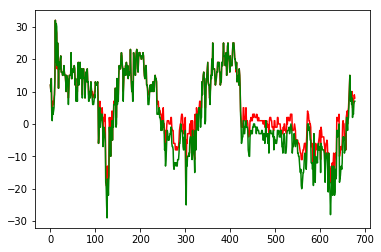

In [227]:
plt.plot(data['temperature_value'], 'r')
plt.plot(data['feels_like'], 'g')
plt.show()

Both of 'feels_like' and 'temperature_value' are very similar. In this case, it's really unnecessary to have them all in our dataset. Plus, it will be very difficult to survey how do poeple feel about the temperature using a large scale numbers! So I plan to drop 'feels_like' feature and put some new features intuitively.

In [200]:
data_raw['city'].value_counts()

Saint Petersburg    640
Ekaterinburg         28
Moscow               10
Name: city, dtype: int64

In [201]:
city = data_raw['city'].replace(('Saint Petersburg', 'Ekaterinburg', 'Moscow'), (1,2,3))
data_raw['City'] = city

It's really interesting to know what relation between trip status and destinations so I have a plan to put it in

In [202]:
data_raw['trip_status'].value_counts()

Completed    668
Cancelled     10
Name: trip_status, dtype: int64

In [203]:
trip_status = data_raw['trip_status'].replace(('Completed', 'Cancelled'), (1,0))
data_raw['trip_completeness'] = trip_status

In [204]:
data_raw['weather_main'].value_counts()

partly-cloudy-day      281
cloudy                 171
partly-cloudy-night    106
clear-day               57
wind                    15
rain                    14
clear-night             12
fog                     11
snow                    11
Name: weather_main, dtype: int64

In [205]:
weather_main = data_raw['weather_main'].replace(('partly-cloudy-day','cloudy','partly-cloudy-night','clear-day','wind','rain','clear-night','fog','snow'),(9,8,7,6,5,4,3,2,1))
data_raw['weather'] = weather_main

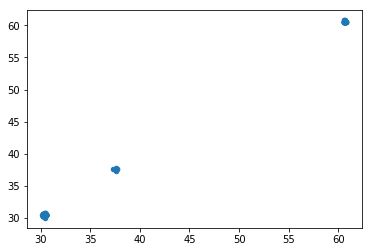

In [214]:
plt.scatter(x=dataset['pickup_long'], y=dataset['dropoff_long'], s=20)

In [230]:
print('Total distances: ', data_raw['distance_kms'].sum())
print('Max distances: ', data_raw['distance_kms'].max())
print('Min distances: ', data_raw['distance_kms'].min())
print('Average distances: ', data_raw['distance_kms'].mean())

Total distances:  6819.18
Max distances:  46.74
Min distances:  0.01
Average distances:  10.057787610619469


Many people travelled not so far from the pickup point. As we can see, the average of travel distance is ~10 kilometers. 
It's safe to say people still travel in the same city.

In [231]:
dataset = data_raw[['pickup_long','City','weather','trip_completeness','temperature_value','rub_usd_exchange_rate','dropoff_long']]
dataset

,pickup_long,City,weather,trip_completeness,temperature_value,rub_usd_exchange_rate,dropoff_long
0,30.329826,1,9,1,12,51.28,30.307655
1,30.307313,1,9,1,10,51.28,30.329495
2,30.329416,1,9,1,14,49.50,30.387561
3,30.311159,1,7,1,3,49.53,30.308489
4,30.308553,1,7,1,3,49.53,30.329402
5,30.321773,1,8,1,7,49.26,30.388147
6,30.387829,1,8,1,6,49.26,30.329518
7,30.330248,1,9,1,6,49.55,30.359076
8,30.356079,1,9,1,8,49.55,30.388656
9,30.388166,1,9,1,9,49.55,30.329493


In [232]:
dataset.dtypes

pickup_long              float64
City                       int64
weather                    int64
trip_completeness          int64
temperature_value          int64
rub_usd_exchange_rate    float64
dropoff_long             float64
dtype: object

I'm checking affectness of the features for my lastest dataset

In [240]:
predictor2 = data_raw[['pickup_long','City','weather','trip_completeness','temperature_value','rub_usd_exchange_rate']]
target2 = data_raw['dropoff_long']

f_regression(predictor2, target2)[1].round(2)

array([0.  , 0.  , 0.  , 0.47, 0.  , 0.  ])

From this point, I will put off the 'trip_completeness' since it's unneeded

And there it is: An interpretable and light dataset to be putted in to my prototype app is shown below

In [254]:
data = data_raw[['pickup_long','City','weather','temperature_value','rub_usd_exchange_rate', 'dropoff_long']]
data

,pickup_long,City,weather,temperature_value,rub_usd_exchange_rate,dropoff_long
0,30.329826,1,9,12,51.28,30.307655
1,30.307313,1,9,10,51.28,30.329495
2,30.329416,1,9,14,49.50,30.387561
3,30.311159,1,7,3,49.53,30.308489
4,30.308553,1,7,3,49.53,30.329402
5,30.321773,1,8,7,49.26,30.388147
6,30.387829,1,8,6,49.26,30.329518
7,30.330248,1,9,6,49.55,30.359076
8,30.356079,1,9,8,49.55,30.388656
9,30.388166,1,9,9,49.55,30.329493


# Modelling

In [255]:
array = data.values
X = array[:, 0:5]
Y = array[:, 5]

In [256]:
X.shape

(678, 5)

In [276]:
seed = 5
test_size = 0.7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [290]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#The coefficients
print('Coefficients: ', model.coef_)
# The intercept
print('Intercept: ', model.intercept_)

#The adjusted r square
n = X.shape[0]
p = X.shape[1]
r_square = model.score(X_train, Y_train)

adj_r2 = 1-((1-r_square)*(n-1)/(n-p-1))

print('Adjusted R Square: {}%'.format(adj_r2.round(5)*100))

Coefficients:  [ 9.98334984e-01  3.44054310e-02  2.14458269e-03 -6.34296789e-05
 -6.27260252e-04]
Intercept:  0.035952371526782656
Adjusted R Square: 99.983%


Since the average of people's travel distances are not that far,  the model must be fully-fit.
I got 99.988% adjusted R2 Score.

# Random Testing 

In [357]:
x_sample = X[600:610]
y_sample = Y[600:610]
y2 = model.predict(x_sample)

#The adjusted r square
n2 = x_sample.shape[0]
p2 = x_sample.shape[1]
r_square2 = model.score(x_sample, y_sample)

adj_rsquare = 1-((1-r_square2)*(n2-1)/(n2-p2-1))

print('Adjusted R Square:{}%'.format(adj_rsquare.round(5)*100))

Adjusted R Square:99.211%


In [355]:
y_sample

array([37.63732  , 37.271233 , 30.3664563, 30.40226  , 30.41786  ,
       30.359217 , 30.40226  , 30.3664563, 30.40226  , 30.3664563])

In [353]:
y2

array([37.34839913, 37.69328037, 30.27216341, 30.3694573 , 30.40359764,
       30.41552974, 30.35790385, 30.40121561, 30.36532635, 30.40130911])